In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
data = np.sin(np.array(range(0,90)) * np.pi / 180. )

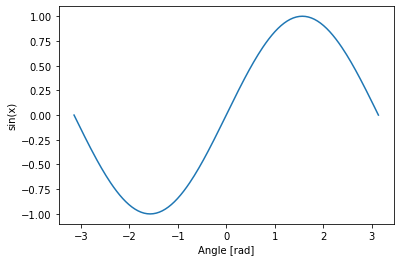

In [12]:
x = np.linspace(-np.pi, np.pi, 201)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [20]:
model = Sequential()
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# define input sequence
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (3122, 20, 1)
y.shape = (3122,)


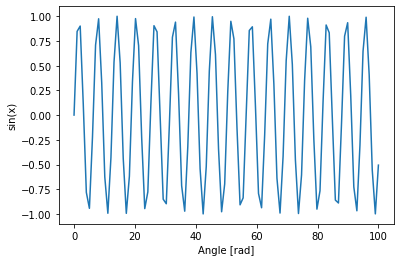

In [31]:
x = np.linspace(0, len(train_seq[0:100]), len(train_seq[0:100]))
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [57]:
train_seq[1:22]

array([0.09983342, 0.19866933, 0.29552021, 0.38941834, 0.47942554,
       0.56464247, 0.64421769, 0.71735609, 0.78332691, 0.84147098,
       0.89120736, 0.93203909, 0.96355819, 0.98544973, 0.99749499,
       0.9995736 , 0.99166481, 0.97384763, 0.94630009, 0.90929743,
       0.86320937])

In [55]:
y[1]

0.8632093666489346

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
3122/3122 [==============================] - 7s 2ms/step - loss: 0.2196
Epoch 2/20
3122/3122 [==============================] - 3s 1ms/step - loss: 0.0607
Epoch 3/20
3122/3122 [==============================] - 3s 1ms/step - loss: 0.0135
Epoch 4/20
3122/3122 [==============================] - 3s 1ms/step - loss: 0.0083
Epoch 5/20
3122/3122 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 6/20
3122/3122 [==============================] - 3s 1ms/step - loss: 0.0024
Epoch 7/20
3122/3122 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 8/20
3122/3122 [==============================] - 3s 1ms/step - loss: 6.6442e-04
Epoch 9/20
3122/3122 [==============================] - 3s 1ms/step - loss: 3.9929e-04
Epoch 10/20
3122/3122 [==============================] - 3s 1ms/step - loss: 2.7649e-04
Epoch 11/20
3122/3122 [==============================] - 3s 1ms/step - loss: 2.0735e-04
Epoch 12/20
3122/3122

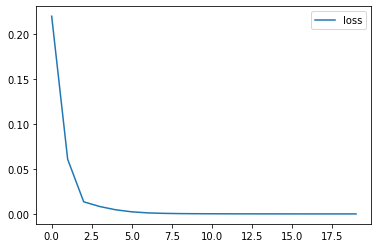

In [58]:
history = model.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()